##### <p> Samuel Wolfe <br> June 11th, 2023 <br> MSBA 206 <br> DMBA Chapter 4 </p>

##### 4.1
a.  The quantitative variables are continuous in nature and can take on any numerical value within a range.<br>
    Quantitative/numerical: calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, weight, cups, rating<br>
    The ordinal variable has a natural ordering but the difference between each level is not necessarily the same.<br>
    Ordinal: shelf<br>
    The nominal variables are categorical and have no inherent ordering or numerical value.<br>
    Nominal: name, mfr, type<br>
b.  See code #4.1.b below<br>
c.  See code #4.1.c below<br>
    i. Looking at the data from 4.1.b Calories, Potass, Rating, Sodium, Vitamins show the largest variability. This is because their SD is so much larger.<br>
    ii. Using the the pandas function .skew() data from 4.1.c Fat, Fiber, Potass, and Vitamins are variables with Skewness. <br>
    iii. Fiber, Vitamins, and weight are extremes based on the pandas function .kurt() used in 4.1.c.<br>
d.  See code #4.1.d below<br>
    Looking at the boxplot, we cant really tell all that much. There are only a few cereals that are hot. The number of observations for cold cereal is much more predictable because of this.
e.  See code #4.1.e below<br>
    Looking at the boxplot, we can see that Shelf height 1 and 3 are similar and 2 is different, so we could predict consumer rating by shelf height.<br>
    We do not need to keep all three variable elements however. We could reduce to a dummy variable as "shelf 2 or not shelf 2" to simplify our setup.<br>
f.  See code #4.1.f below<br>
    i. Using the .unstack() function, sorting, and only taking values not equal to 1 we find that Potass and Fiber are the most strongly correlated.
    ii. as shown, we can reduce the number of variables by using a cutoff value to drop any variable not correlated enough for our use.
    iii. It does not change the correlations if we normalize the data.
g.  The PC1 from Table 4.12 tells us that sodium has a very high negative weight on the full list.<br>
    After that it is potass (positive), vitamins (negative), calories(negative), and rating (positive)<br>
    Looking at the cumulative proportion for these variables we can see that PC1, PC2, and PC3 account for 96.56% of the total variation of the data.<br>
    With that we can guess that about 25% of the data is actually required. Using PC1 as a guide we see that we can use Sodium, Potass, Vitamins, and Calories.<br>
    Which are daily value hot topics with individuals wanting to watch their intake.

In [5]:
#4.1.b
import pandas as pd
fileLocation = r'E:\Aliit\School\MSBA\206\dmba-datasets\Cereals.csv'
dfcereal = pd.read_csv(fileLocation)
dfcerealStats = pd.DataFrame({'Mean' : dfcereal.mean(numeric_only=True),
            'SD' : dfcereal.std(numeric_only=True),
            'Min' : dfcereal.min(), 
            'Max' : dfcereal.max(),
            'Median' : dfcereal.median(numeric_only=True),
            })
dfcerealStats = dfcerealStats.dropna()
print(dfcerealStats)

                Mean         SD        Min        Max      Median
calories  106.883117  19.484119         50        160  110.000000
carbo      14.802632   3.907326        5.0       23.0   14.500000
cups        0.821039   0.232716       0.25        1.5    0.750000
fat         1.012987   1.006473          0          5    1.000000
fiber       2.151948   2.383364        0.0       14.0    2.000000
potass     98.666667  70.410636       15.0      330.0   90.000000
protein     2.545455   1.094790          1          6    3.000000
rating     42.665705  14.047289  18.042851  93.704912   40.400208
shelf       2.207792   0.832524          1          3    2.000000
sodium    159.675325  83.832295          0        320  180.000000
sugars      7.026316   4.378656        0.0       15.0    7.000000
vitamins   28.246753  22.342523          0        100   25.000000
weight      1.029610   0.150477        0.5        1.5    1.000000


Skewness
 calories   -0.445407
carbo       0.112726
cups       -0.104981
fat         1.165989
fiber       2.431675
potass      1.400355
protein     0.745830
rating      0.910240
shelf      -0.410339
sodium     -0.575711
sugars      0.044445
vitamins    2.463704
weight      0.309857
dtype: float64 

Kurtosis
 calories    2.370146
carbo      -0.337237
cups        0.352226
fat         2.044655
fiber       8.647492
potass      1.963826
protein     1.184656
rating      1.318747
shelf      -1.439201
sodium     -0.345243
sugars     -1.153359
vitamins    6.257233
weight      5.422454
dtype: float64


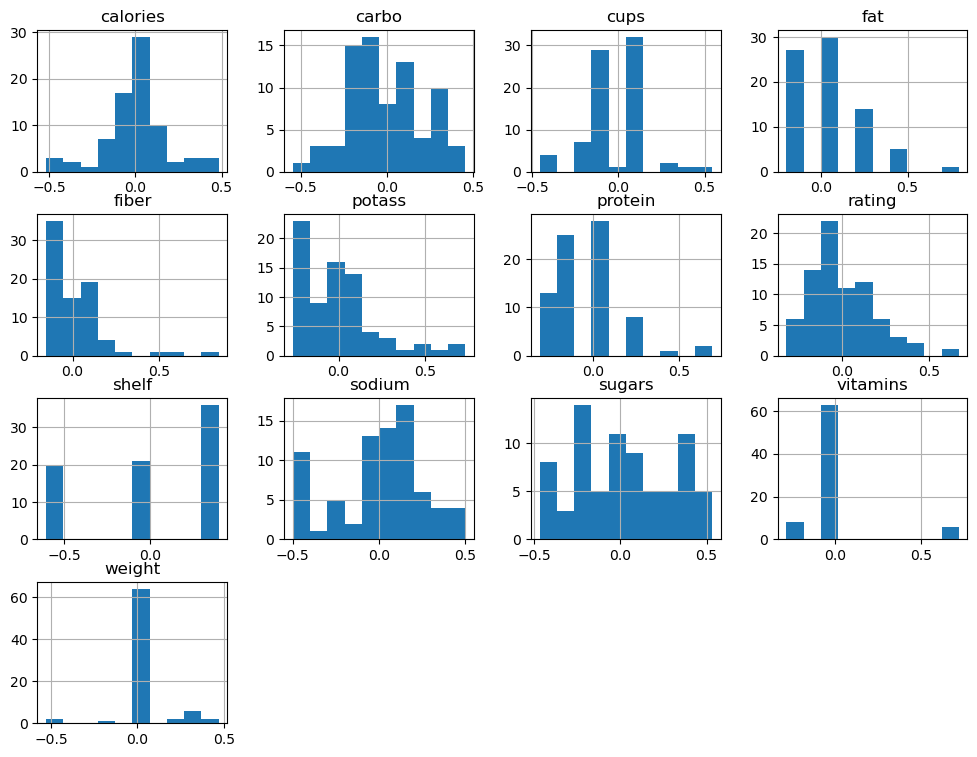

In [6]:
#4.1.c
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
fileLocation = r'E:\Aliit\School\MSBA\206\dmba-datasets\Cereals.csv'
dfcereal = pd.read_csv(fileLocation)
#going to normalize the data to help understand the data better
dfcerealNorm = (dfcereal - dfcereal.mean(numeric_only=True)) / (dfcereal.max(numeric_only=True) - dfcereal.min(numeric_only=True))
dfcerealHist = dfcerealNorm.hist(figsize=[12,9])
dfcerealSkew = dfcerealNorm.skew(numeric_only=True)
dfcerealKurt = dfcerealNorm.kurt(numeric_only=True)
print("Skewness\n", dfcerealSkew, "\n")
print("Kurtosis\n", dfcerealKurt)

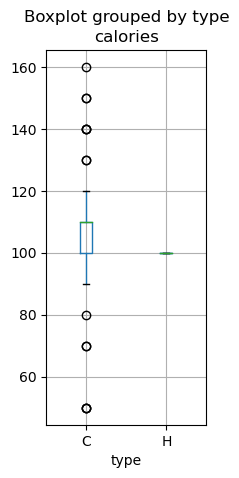

In [7]:
#4.1.d
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
fileLocation = r'E:\Aliit\School\MSBA\206\dmba-datasets\Cereals.csv'
dfcereal = pd.read_csv(fileLocation)
dfcerealHCPlot = dfcereal.boxplot(column='calories', by="type", figsize=[2,5])

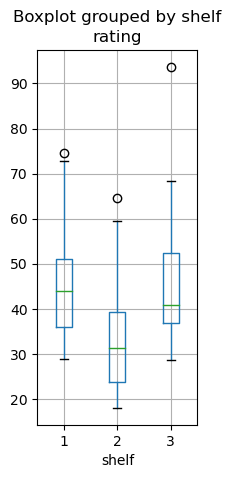

In [8]:
#4.1.e
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
fileLocation = r'E:\Aliit\School\MSBA\206\dmba-datasets\Cereals.csv'
dfcereal = pd.read_csv(fileLocation)
dfcerealHCPlot = dfcereal.boxplot(column='rating', by="shelf", figsize=[2,5])

Most correlated
 potass  fiber    0.911528
dtype: float64
Correlation
 calories    3
protein     2
fat         0
sodium      0
fiber       4
carbo       0
sugars      2
potass      3
vitamins    0
shelf       0
weight      1
cups        2
rating      3
dtype: int64
Normalized Correlated
 fiber  potass    0.911528
dtype: float64


<Axes: >

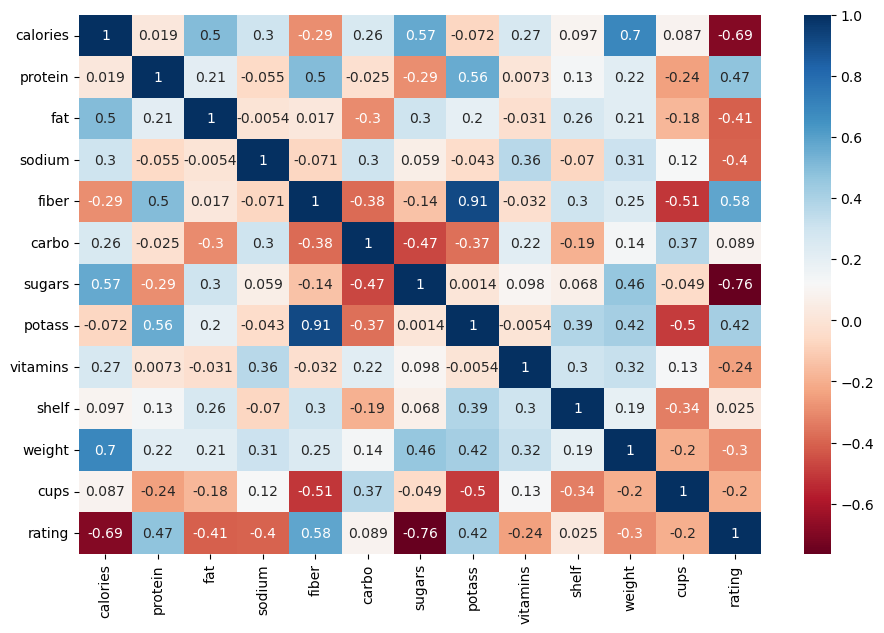

In [9]:
#4.1.f
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
fileLocation = r'E:\Aliit\School\MSBA\206\dmba-datasets\Cereals.csv'
dfcereal = pd.read_csv(fileLocation)
dfcerealCorr = dfcereal.corr(numeric_only=True)
dfcerealCorrPair = dfcerealCorr.unstack().sort_values(ascending=False).drop_duplicates()
dfcerealCorrPairMost = dfcerealCorrPair[dfcerealCorrPair != 1.0].head(1)
print("Most correlated\n", dfcerealCorrPairMost)
cutoff = 0.5
dfcerealCorrReduced = (dfcerealCorr.abs() > cutoff).sum() - 1
print("Correlation\n", dfcerealCorrReduced)
dfcerealNorm = (dfcereal - dfcereal.mean(numeric_only=True)) / dfcereal.std(numeric_only=True)
dfcerealNormCorr = dfcerealNorm.corr(numeric_only=True)
dfcerealNormCorrPair = dfcerealNormCorr.unstack().sort_values(ascending=False).drop_duplicates()
dfcerealNormCorrPairMost = dfcerealNormCorrPair[dfcerealNormCorrPair != 1.0].head(1)
print("Normalized Correlated\n", dfcerealNormCorrPairMost)
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(dfcerealCorr, annot=True, xticklabels=dfcerealCorr.columns, yticklabels=dfcerealCorr.columns, cmap='RdBu')

##### 4.2
a.  See code 4.2.a below<br>
b.  See code 4.2.b below<br>
    The data should be normalized because we are dealing with two distinct unit types, dollars and number of individuals. I have performed my analysis after normalizing the data.<br>
    Broad strokes we see that the first 10 components account for 96.01% of the total variation associated with all 16 variables. I will do analysis on the first component. <br>
    PC1 compares %new students, faculty ratio, student to faculty ratio, and graduation rate to the cost of tuition, room, and board. This can be useful because it tells us how much<br>
    an individual values these types of ratios vs the cost of attending that university. We can also begin to analyze which variables we actually need and what can be turned into dummy variables.<br>
    % new stud. from top 10&25% are weighted so closely we could consider turning them into a dummy variable, either they are from the top 25% or they are not. <br>
    In-state and out-of-state tuition could also be turned into a dummy variable. On the face of it its one or the other. Its important to note the weight of the variables here though. <br>
    Room and board can also be likely bundled into a single dummy variable. Either they matter to a student or they do not. <br>
    % of faculty with PHD and student to faculty ratio can be a single dummy variable. If a prospective student cares about faculty with PHD then they may not care about the faculty to student ratio. <br>
    Graduation rate is difficult to interpret with PC1 as it could broadly impact every other variable in the decision making process. This variable should remain in the dataset and should remain undisturbed.<br>

In [10]:
#4.2.a
import pandas as pd
fileLocation = r'E:\Aliit\School\MSBA\206\dmba-datasets\Universities.csv'
dfURank = pd.read_csv(fileLocation)
dfURankNum = dfURank.drop(columns=["College Name", "State", "Public (1)/ Private (2)"])
dfURankNum = dfURankNum.dropna()

In [11]:
#4.2.b
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
fileLocation = r'E:\Aliit\School\MSBA\206\dmba-datasets\Universities.csv'
dfURank = pd.read_csv(fileLocation)
dfURankNum = dfURank.drop(columns=["College Name", "State", "Public (1)/ Private (2)"])
dfURankNum = dfURankNum.dropna()
dfURankNumNorm = (dfURankNum - dfURankNum.mean(numeric_only=True)) / dfURankNum.std(numeric_only=True)
pcs = PCA(n_components=len(dfURankNumNorm.columns))
pcs.fit(dfURankNumNorm)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
print(pcsSummary_df)
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=dfURankNumNorm.columns)
print(pcsComponents_df)

                              0         1         2         3         4   \
Standard deviation      2.274872  2.142595  1.098381  1.032466  0.975987   
Proportion of variance  0.304414  0.270042  0.070967  0.062705  0.056032   
Cumulative proportion   0.304414  0.574456  0.645423  0.708128  0.764161   

                              5         6         7         8         9   \
Standard deviation      0.872839  0.803273  0.772790  0.703163  0.662225   
Proportion of variance  0.044815  0.037956  0.035130  0.029085  0.025797   
Cumulative proportion   0.808975  0.846931  0.882061  0.911145  0.936942   

                              10        11        12        13        14  \
Standard deviation      0.627878  0.549735  0.438306  0.303895  0.200023   
Proportion of variance  0.023190  0.017777  0.011301  0.005432  0.002353   
Cumulative proportion   0.960132  0.977909  0.989210  0.994642  0.996996   

                              15        16  
Standard deviation      0.174279  0.1438